## Exercise 5

Build a transfer line of 10 m with 4 quads of L=0.4 m (centred at 2, 4, 6, and 8 m).  With K1 respectively of 0.1, 0.1 , 0.1 , 0.1 m$^{−2}$.  Can you find a periodic solution of this lattice? Compute the final optical condition starting from ($\beta_x,~\alpha_x,~\beta_y,~\alpha_y$) = (1 m, 0, 2 m, 0). Match the line to the downstream synchrotron, assume that the injection point of the synchrotron has ($\beta_x,~\alpha_x,~\beta_y,~\alpha_y$) = (2 m, 0, 
1 m, 0). Add 2 horizontal correctors in the transfer line and use MAD-X to compute the 4 terms of the transfer matrix between the corrector kicks and the x-x' position of the beam at the end of the line.  Using this matrix compute the correctors strength needed to have ($\Delta$x= 1 mm, $\Delta$x'= 0).

In [18]:
from cpymad.madx import Madx
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
%config InlineBackend.figure_format = 'retina' # retina display
import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5,lw=3):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return;

In [19]:
madx=Madx()
madx.input('''
TITLE, ’CAS Fifth  Exercise’; 

quadrupoleLength=0.1;
cellLength=10;



myk1=.1;// m^-2
myk2=.1;// m^-2
myk3=.1;// m^-2
myk4=.1;// m^-2

Q: quadrupole, L=quadrupoleLength;
hkicker1: hkicker, kick:=theta1;
hkicker2: hkicker, kick:=theta2;

cas5:sequence, refer=center, L=cellLength;
q1: Q, K1:=myk1, at=2;
myCorrector1: hkicker1, at=2.4;
q2: Q, K1:=myk2, at=4;
q3: Q, K1:=myk3, at=6;
myCorrector2: hkicker2, at=6.4;
q4: Q, K1:=myk4, at=8;
endsequence;

beam, particle=proton, energy=2;
select,flag=interpolate, class=drift, slice=10, range=#s/#e;
select,flag=interpolate, class=quadrupole, slice=5, range=#s/#e;

use, sequence=cas5;
twiss;
''');



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2022.11.12 17:32:05      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCLORB:  Vertical plane might be unstable More information with the debug flag on.                                                                                                                                                                                 
++++++ warning: TWCPIN:  Mode 2 is unstable for delta(p)/p =     0.000000: cosmux =     0.805975, cosmuy =     1.206091                                                        
++++++ warning: Twiss failed:  MAD-X continues


++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed


In [20]:
madx.table.twiss.dframe()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1


There is not a periodic solution!

In [22]:
madx.input('''
use, sequence=cas5;
savebeta, label=betaEnd, place=#e;
twiss,betx=1, bety=2;
''')

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       0.236117848                  0        85.59952509                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2150800354 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 


True

(-5.0, 150.0)

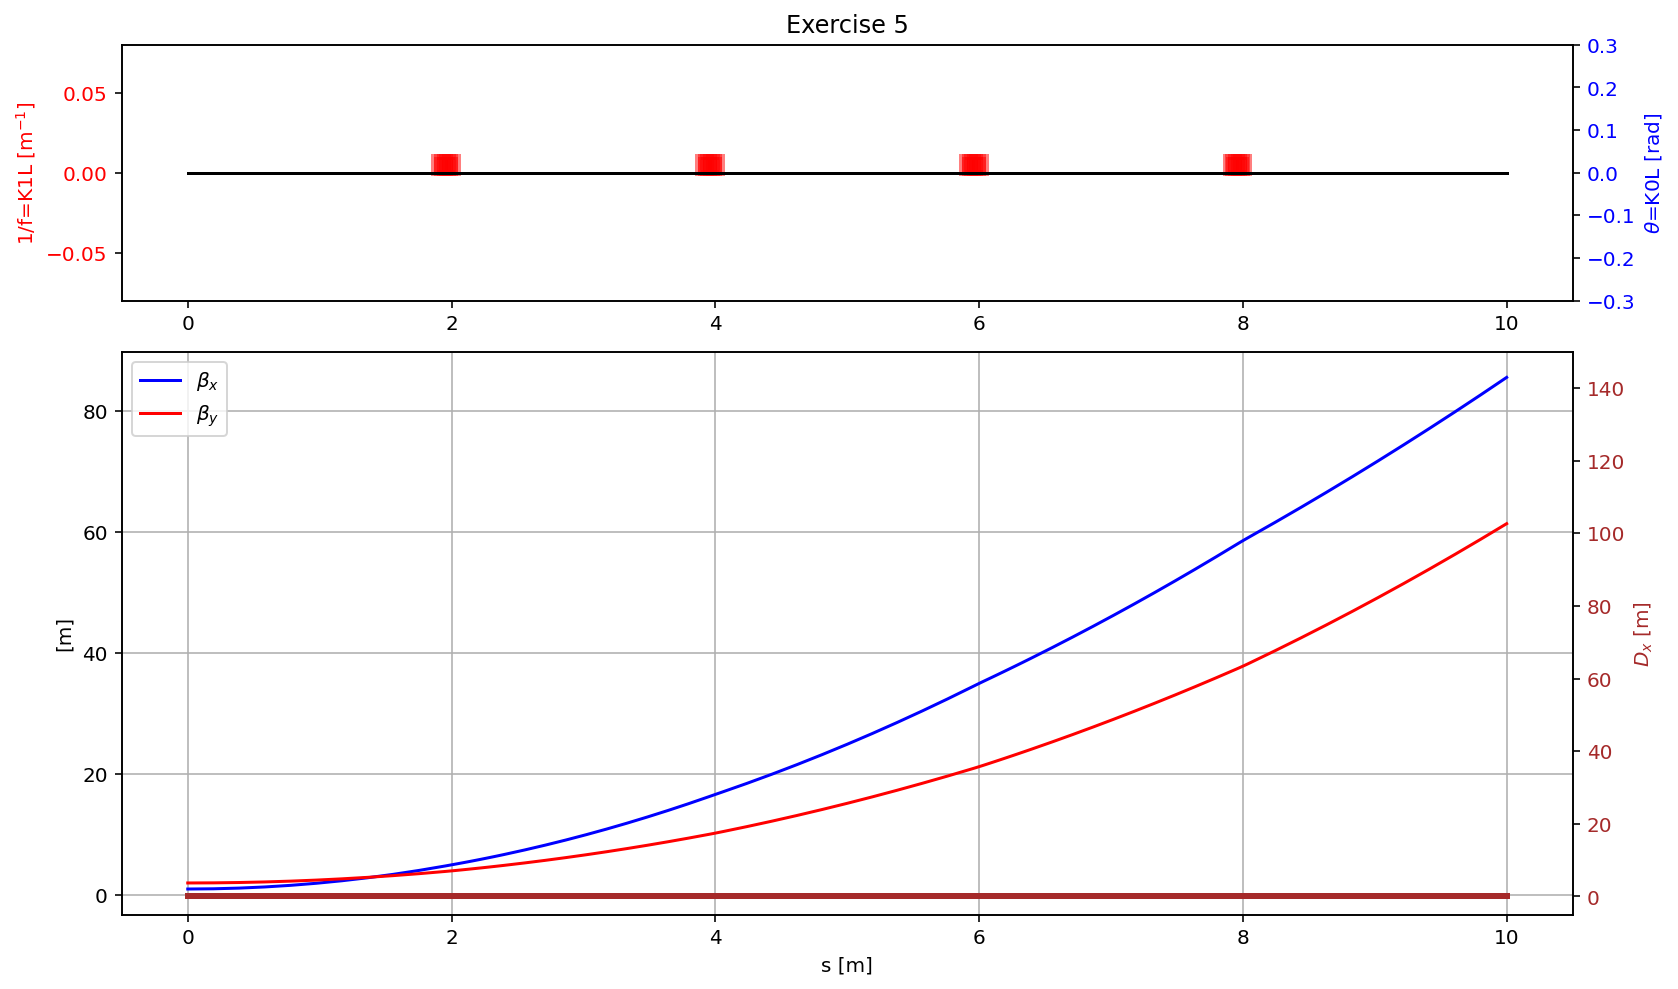

In [23]:
myTwiss=madx.table.twiss.dframe()
myTwissRef=madx.table.twiss.dframe()

fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-.08,.08)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

In [24]:
# this is the savebeta point
madx.value('betaEnd->betx');
madx.value('betaEnd->bety');
madx.value('betaEnd->alfx');
madx.value('betaEnd->alfy');

betaend->betx      =        85.59952509 ;
betaend->bety      =        61.41336649 ;
betaend->alfx      =       -7.397890988 ;
betaend->alfy      =        -6.62454697 ;


In [25]:
madx.input('''
MATCH, SEQUENCE=cas5, betx=1, bety=2;
constraint, betx=2, range=#e;
constraint, alfx=0, range=#e;
constraint, bety=1, range=#e;
constraint, alfy=0, range=#e;
VARY, NAME= myk1, STEP=0.00001;
VARY, NAME= myk2, STEP=0.00001;
VARY, NAME= myk3, STEP=0.00001;
VARY, NAME= myk4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;
twiss,betx=1, bety=2;
''')

START MATCHING

number of sequences: 1
sequence name: cas5
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049999680949820E+05


 Solve system with            4 con,           4 var
 Rank             4   Condition number    806.96395979458009     
 Step length    1.0002004021662587     
 Bisec iteration            3
call:     2 Dx =   0.80119192E+01  Penalty function =  0.4892946324574609E+06
 Solve system with            4 con,           4 var
 Rank             4   Condition number    108.17118597127080     
 Step length   0.19504885305165923     
call:     3 Dx =   0.19504885E+00  Penalty function =  0.4353984173524984E+05
 Solve system with            4 con,           4 var
 Rank             4   Condition number    263.15013351204306     
 Step length   

True

(-5.0, 150.0)

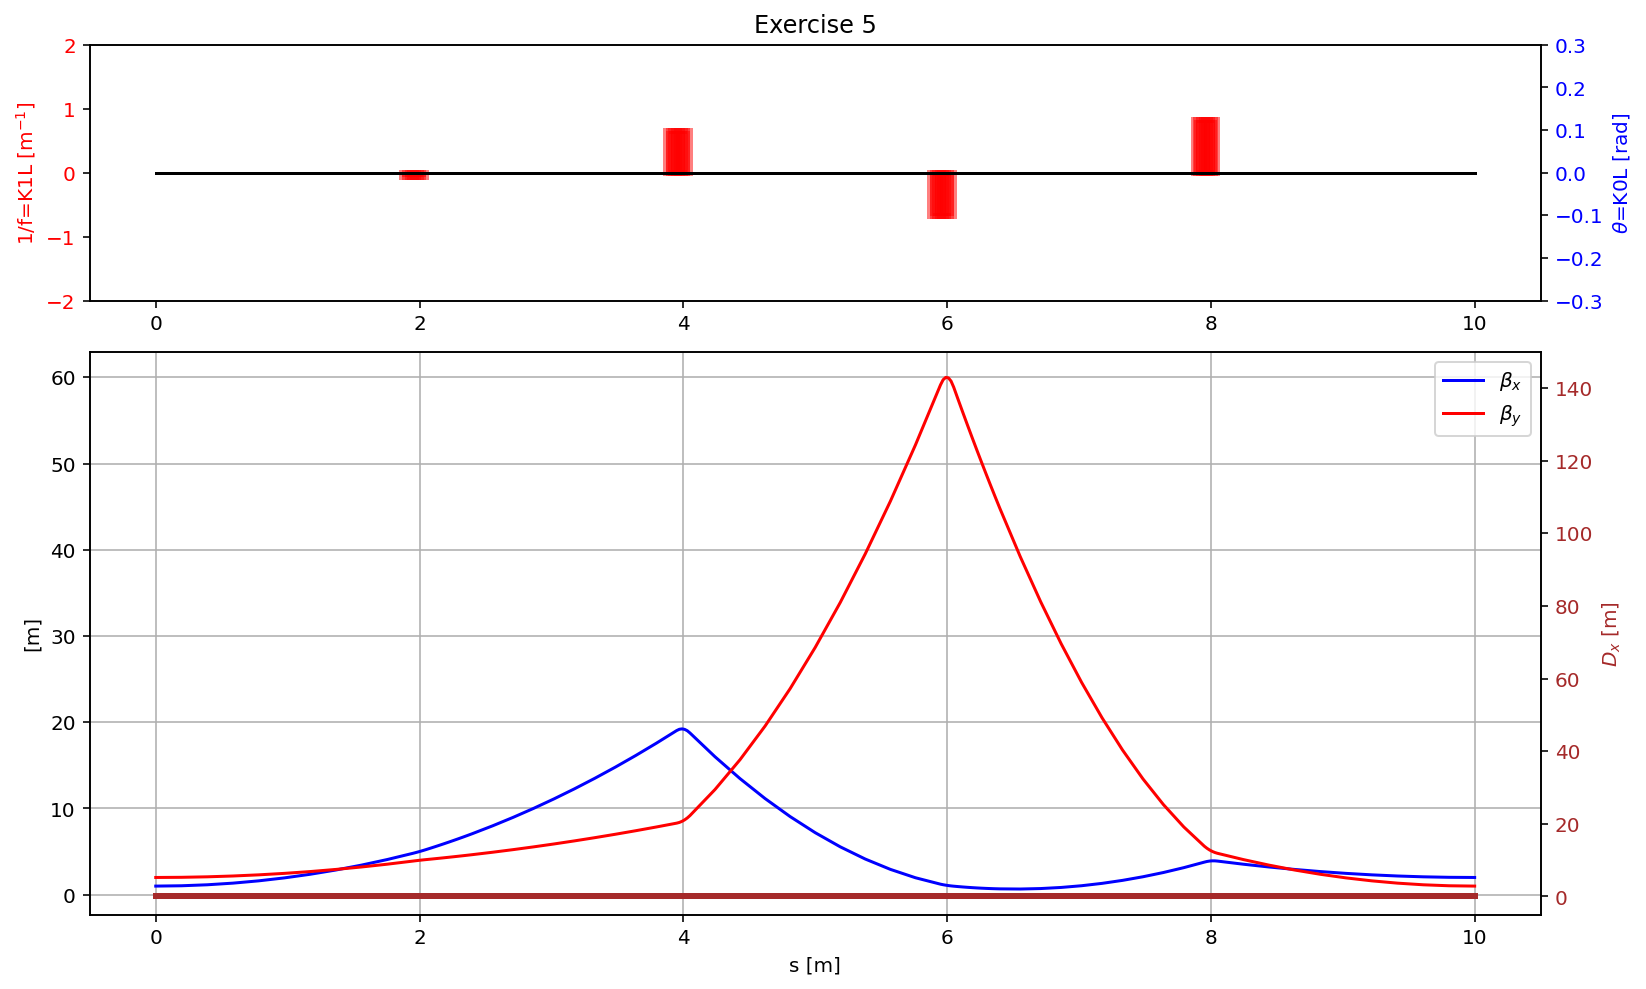

In [26]:
myTwiss=madx.table.twiss.dframe()
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-2,2)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

In [27]:
madx.input('''
MATCH, SEQUENCE=cas5, betx=1, bety=2;
constraint, betx=betaEnd->betx, range=#e;
constraint, alfx=betaEnd->alfx, range=#e;
constraint, bety=betaEnd->bety, range=#e;
constraint, alfy=betaEnd->alfy, range=#e;
VARY, NAME= myk1, STEP=0.00001;
VARY, NAME= myk2, STEP=0.00001;
VARY, NAME= myk3, STEP=0.00001;
VARY, NAME= myk4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2;
''')

START MATCHING

number of sequences: 1
sequence name: cas5
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049999680949817E+05


 Solve system with            4 con,           4 var
 Rank             4   Condition number    126.86223297100123     
 Step length   0.99071441358925405     
 Bisec iteration            3
call:     2 Dx =   0.68098673E+01  Penalty function =  0.1668070805396705E+08
 Solve system with            4 con,           4 var
 Rank             4   Condition number    214.57452530502280     
 Step length   0.34939685498120165     
call:     3 Dx =   0.34939685E+00  Penalty function =  0.1519155748498464E+07
 Solve system with            4 con,           4 var
 Rank             4   Condition number    116.72778452242675     
 Step length   

True

(-5.0, 150.0)

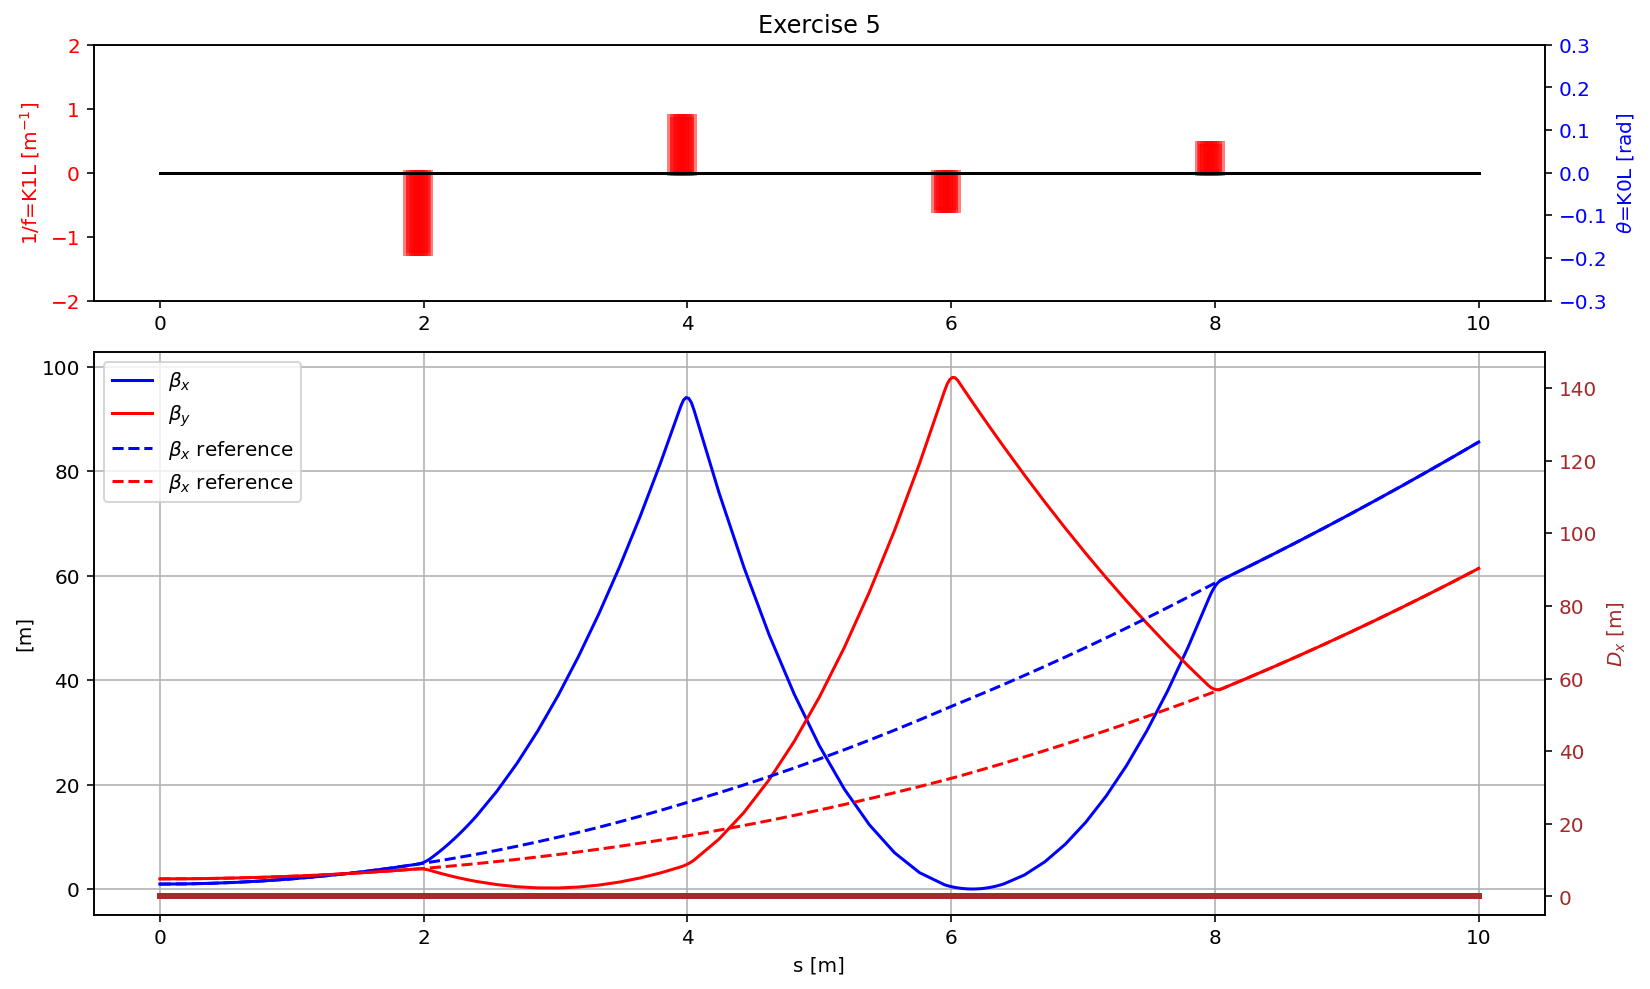

In [28]:
myTwiss=madx.table.twiss.dframe()
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-2,2)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')

plt.plot(myTwissRef['s'],myTwissRef['betx'],'--b', label='$\\beta_x$ reference')
plt.plot(myTwissRef['s'],myTwissRef['bety'],'--r', label='$\\beta_x$ reference')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

**Important observation**: you did not find back the initial configuration! The solution is not unique, and the one just found is not optimal! The conclusions is not to use blindly the matching, you need to suggest a good starting point

In [29]:
madx.input('''
myk1=.05;
myk2=.05;
myk3=.05;
myk4=.05;

MATCH, SEQUENCE=cas5, betx=1, bety=2;
constraint, betx=betaEnd->betx, range=#e;
constraint, alfx=betaEnd->alfx, range=#e;
constraint, bety=betaEnd->bety, range=#e;
constraint, alfy=betaEnd->alfy, range=#e;
VARY, NAME= myk1, STEP=0.00001;
VARY, NAME= myk2, STEP=0.00001;
VARY, NAME= myk3, STEP=0.00001;
VARY, NAME= myk4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2;
''')

++++++ info: myk1 redefined
++++++ info: myk2 redefined
++++++ info: myk3 redefined
++++++ info: myk4 redefined
START MATCHING

number of sequences: 1
sequence name: cas5
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.3057656867907995E+03


 Solve system with            4 con,           4 var
 Rank             4   Condition number    1489.3550432978275     
 Step length   0.99556274659248989     
 Bisec iteration            1
call:     2 Dx =   0.19777253E+01  Penalty function =  0.7129950417101111E+02
 Solve system with            4 con,           4 var
 Rank             4   Condition number    171.13172879010210     
 Step length   0.88654674743099560     
call:     3 Dx =   0.88654675E+00  Penalty function =  0.1353055578408514E+01
 Solve system with    

True

(-5.0, 150.0)

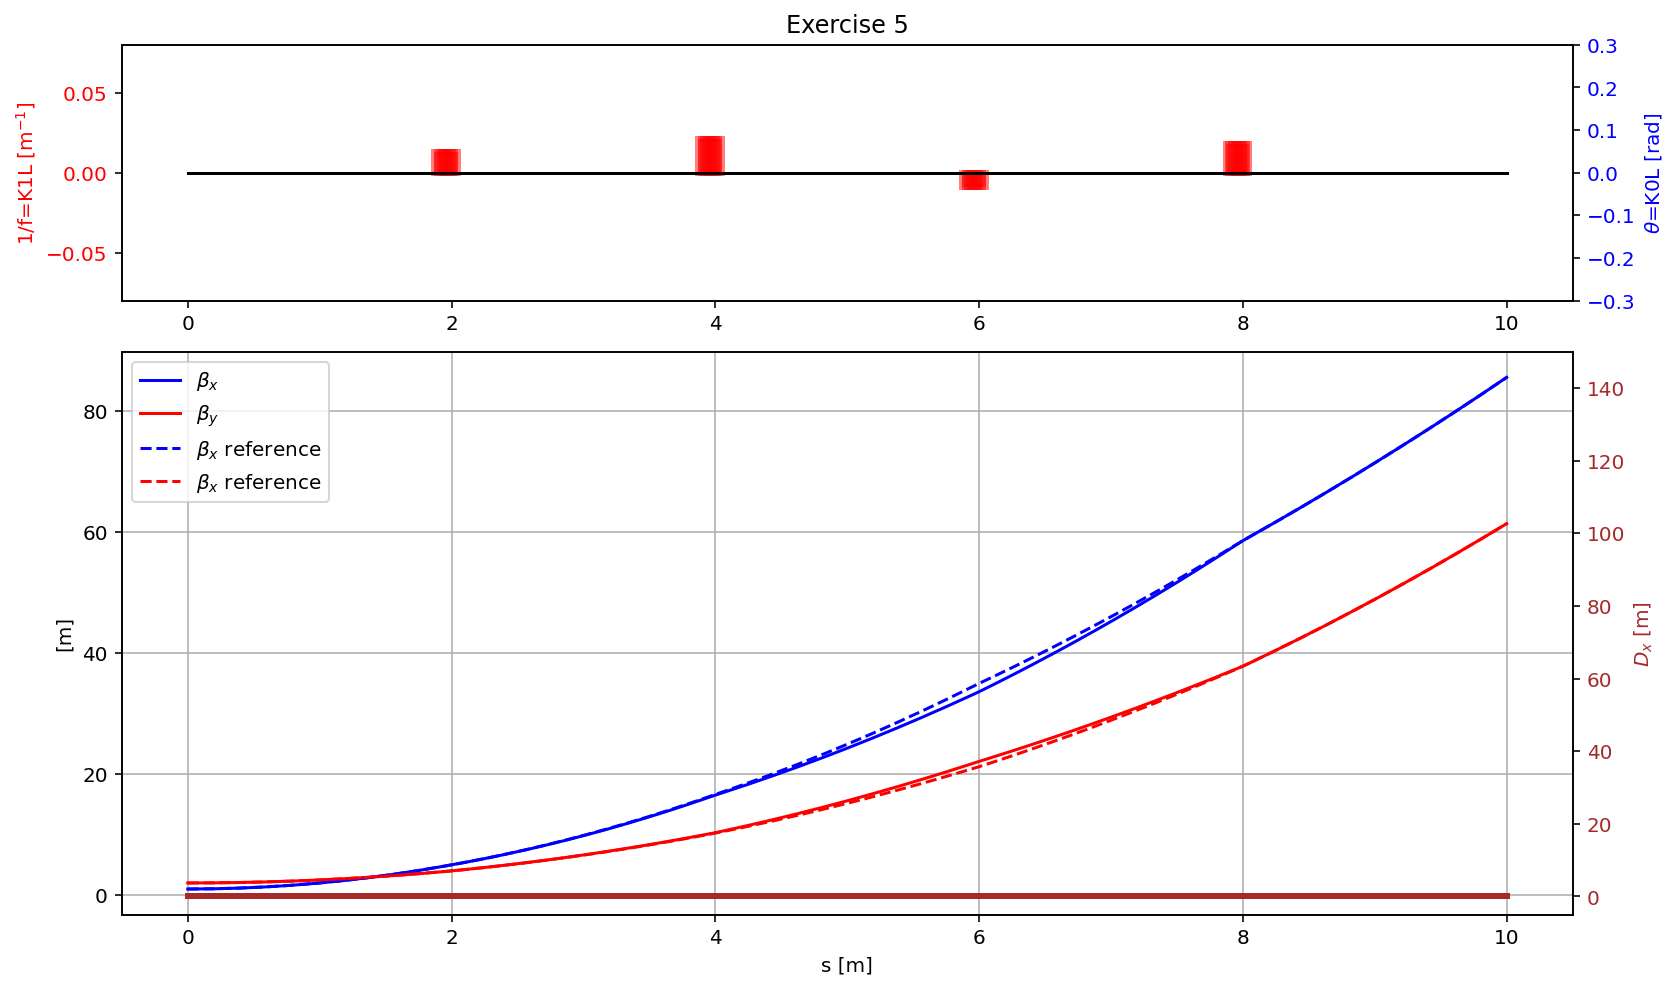

In [30]:
myTwiss=madx.table.twiss.dframe()
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-.08,.08)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.plot(myTwissRef['s'],myTwissRef['betx'],'--b', label='$\\beta_x$ reference')
plt.plot(myTwissRef['s'],myTwissRef['bety'],'--r', label='$\\beta_x$ reference')

plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

### Matrix response of the kickers

In [31]:
madx.input(''' 
theta1=1e-6;
theta2=0e-6;

twiss,betx=1, bety=2;
''')
aux=madx.table.twiss.dframe();
m11= aux.iloc[-1].x/1e-6
m21= aux.iloc[-1].px/1e-6

madx.input(''' 
theta1=0e-6;
theta2=1e-6;
twiss,betx=1, bety=2;
''')
aux=madx.table.twiss.dframe();
m12= aux.iloc[-1].x/1e-6
m22= aux.iloc[-1].px/1e-6

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     7.324945E-06  8.994043E-07  0.000000E+00  0.000000E+00 -4.004110E-12  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2366919613                  0        85.59952509    7.983337371e-06 

             dxrms             xcomax             xcorms                 q2 
   3.931903419e-06     7.32494522e-06    3.548046201e-06       0.2141472156 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 


In [32]:
M_response=np.array([[m11, m12], [m21, m22]])
M_response

array([[7.32494522, 3.54345184],
       [0.89940429, 0.97171865]])

In [33]:
mySolution=np.linalg.inv(M_response)@np.array([[1e-3],[0]])
mySolution

array([[ 0.00024721],
       [-0.00022881]])

In [34]:
madx.input(f''' 
theta1={mySolution[0,0]};
theta2={mySolution[1,0]};
twiss,betx=1, bety=2;
''')
aux=madx.table.twiss.dframe()
aux[['x','px']]

++++++ info: theta1 redefined
++++++ info: theta2 redefined
enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     1.000000E-03  5.759824E-20  0.000000E+00  0.000000E+00 -1.339675E-07  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2366919613                  0        85.59952509     0.001110834196 

             dxrms             xcomax             xcorms                 q2 
   0.0007661552473              0.001    0.0006924133078       0.2141472156 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycoma

,x,px
#s,0.000,0.000000e+00
drift_0[0],0.000,0.000000e+00
drift_0[0],0.000,0.000000e+00
drift_0[0],0.000,0.000000e+00
drift_0[0],0.000,0.000000e+00
...,...,...
drift_6[0],0.001,5.759824e-20
drift_6[0],0.001,5.759824e-20
drift_6[0],0.001,5.759824e-20
drift_6[0],0.001,5.759824e-20


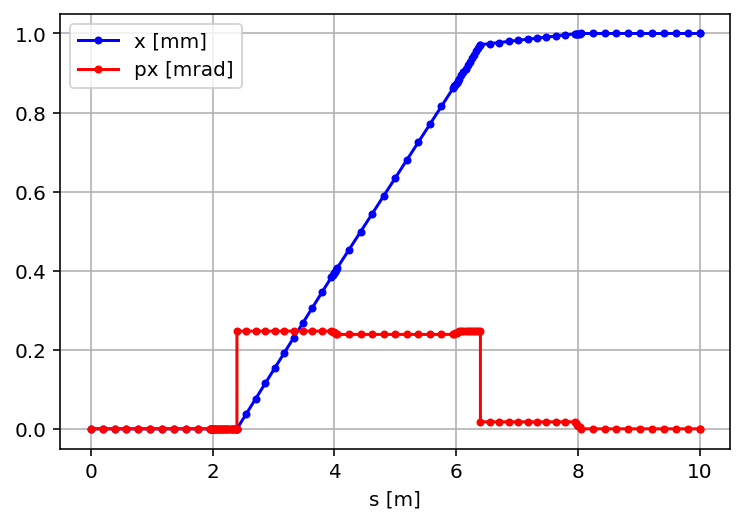

In [35]:
plt.plot(aux['s'],aux['x']*1000,'b.-',label='x [mm]')
plt.plot(aux['s'],aux['px']*1000,'r.-',label='px [mrad]')
plt.grid()
plt.xlabel('s [m]')
plt.legend(loc='best')